# <font color="#ff8104">영화 리뷰 분류 - 이진 분류 예제</font>

In [1]:
from keras.datasets import imdb

`num_words = 10000` : 최빈 단어 1만 개만 사용하겠다는 의미
`train_data, test_data` : 리뷰의 목록, 각 리뷰는 단어 인덱스의 리스트. \[5, 2185, 3, ...\]
`train_labels, test_labes` : 부정을 나타내는 0, 긍정을 나타내는 1의 리스트

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 16s 1us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

단어의 최고 인덱스는 9999을 넘지 않는다(1만 개로 제한했기 때문에)

In [6]:
max([max(seq) for seq in train_data])

9999

### 원래 영단어로는 어떻게 바꿀까?

`i-3` : word_index에서 0, 1, 2 각각은 패딩, 문서 시작, 사전에 없는 단어를 처리하기 위한 인덱스이므로 3을 뺀다.

In [21]:
#word_index : 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index() 
reverse_word_index = dict([ (v, k) for (k, v) in word_index.items() ])

decode_review = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0] ] )

In [22]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 리스트를 텐서로 바꾸기 

신경망에 숫자 리스트를 주입할 수 없다. 리스트를 텐서로 바꾼다.

**리스트를 텐서로 바꾸는 2가지 방법**
<hr>


1. 같은 길이가 되도록 리스트에 패딩 추가. 
2. (samples, sequence_length) 크기의 정수 텐서로 변환 
3. 정수 텐서를 다룰 층을 신경망의 첫번째 층으로 사용(Embedding layer)


<hr>

1. 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환
- ex) \[3, 5\]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10000차원의 벡터로 각각 변환
2. 부동 소수 벡터 데이터를 다룰 Dense 층을 신경망의 첫번째 층으로 사용

우리는 두 번째 방식을 사용한다.

In [24]:
import numpy as np

def vectorize_sequence(seq, dimension=10000) :
    #크기가 (len(seq), dimension )이고 모든 원소가 0인 행렬 
    result = np.zeros((len(seq), dimension ))
    
    for i, s in enumerate(seq) :
        result[i, s] = 1. #특정 인덱스의 위치를 1로 만든다.
        
    return result

**훈련 데이터 벡터화**

In [25]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [26]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

**레이블 벡터화**

In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [28]:
y_train[0]

1.0

### 신경망 모델 만들기

입력 데이터는 벡터, 레이블은 스칼라 (1 or 0) <br>
은닉 유닛 : 은닉층(입력값과 출력값 사이에 존재하는 무수히 많은 층)에 있는 하나하나의 유닛들

<hr>

Dense 층을 쌓을 때 고려할 것 2가지

1. 층의 수 : 얼마나 많은 층을 사용할 것인가 
2. 유닛의 수 : 각 층에 얼마나 많은 유닛을 둘 것인가 

### 활성화 함수

**※활성화 함수가 필요한 이유** : 활성화 함수가 없다면 신경망 층은 (선형 연산인) 점곱과 덧셈 2개로 구성된다. 선형 연산의 결과를 다시 다음 층의 입력값으로 주게 되면, 그 다음층의 결과값도 선형 연산이 되어 층을 여러 개로 구성하는 의미가 없어진다. 그래서 은닉층의 결과를 풍부하게 만들기 위해서는 활성화 함수가 필요하다. 

중간에 있는 은닉 층에는 활성화 함수 relu를 사용

마지막층은 확률을 출력하기 위해서(1에 가까우면 리뷰가 긍정일 가능성이 높다) 시그모이드 함수 사용.

※relu : 음수를 0으로 만드는 함수 <br>
※시그모이드 : 임의의 값을 \[0,1\] 사이로 압축한다.


In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 모델 컴파일하기

마지막으로 손실 함수(오차를 구하는 함수)와 옵티마이저를 선택한다.

여기서는 `binary_crossentropy` 손실이 적합하다.
확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택이다.

※크로스엔트로피 : 확률 분포 간의 차이를 측정한다. 여기서는 원본 분포와 예측 분포 사이를 측정한다.

`mean_squared_error`, `mean_absolute_error`: 회귀 문제에 사용되는 대표적인 손실 함수

In [30]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### 옵티마이저의 매개변수를 바꾸는 경우
<pre><code>
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
</code></pre>


#### 자신만의 손실 함수, 측정 함수를 전달해야할 경우
<pre><code>
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
</code></pre>


### 훈련 검증을 위한 데이터 세트 떼어내기

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 <br>
원본 훈련 데이터에서 10000 샘플을 떼어 검증세트를 만든다.

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련하기

512개의 샘플 = 1개의 미니 배치
20번의 에포크(횟수)만큼 훈련시킨다. 

동시에 따로 떼어놓은 1만 개의 샘플에서 손실, 정확도를 측정해야 하므로, validation_data 매개변수에 위에서 만든 검증 데이터를 전달한다.

In [32]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.4976 - acc: 0.7948 - val_loss: 0.3716 - val_acc: 0.8720
Epoch 2/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.2958 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2160 - acc: 0.9284 - val_loss: 0.3089 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1741 - acc: 0.9437 - val_loss: 0.2829 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8852
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3089 - val_acc: 0.8808
Epoch 7/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3148 - 

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 훈련과 검증의 손실 그리기

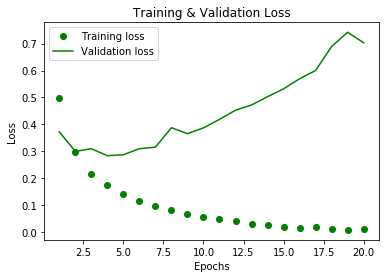

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'go', label='Training loss') #go : green dot
plt.plot(epochs, val_loss, 'g', label='Validation loss') #g : green line
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증의 정확도 그리기

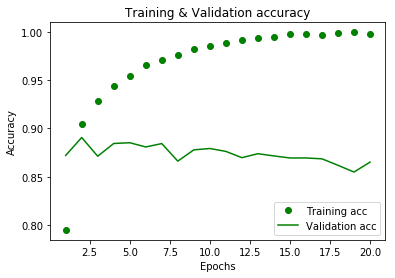

In [36]:
plt.clf() #그래프 초기화하기
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc') #go : green dot
plt.plot(epochs, val_acc, 'g', label='Validation acc') #g : green line
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Overfitting (과대적함)

너무 많은 학습을 시켜서 훈련 데이터에 편향된 판단을 하게 하는 오류.

위의 결과를 보면 훈련 데이터는 갈수록 손실(오차)이 줄어들고, 정확도는 높아지지만 검증 데이터는 반대이다. 훈련 데이터의 레이블에 편향된 판단을 해서 새로운 데이터를 일반화하여 판단하지 못하는 것이다.

위에서 보면 손실이 4번 에포크 정도에서 역전되고 있으므로 4번까지만 진행한다.

### 다시 훈련시키기

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.4724 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2621 - acc: 0.9109
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1983 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 3s 129us/step


In [38]:
result

[0.32421983805656435, 0.87252]

### 이진 분류에서의 양성, 음성 샘플

양성 샘플 : 예측하려는 대상 <br>
음성 샘플 : 예측 대상이 아닌 샘플

예를 들어, 암 진단에 관한 문제에서는 악성 종양이 양성 샘플이 된다.

In [39]:
model.predict(x_test)

array([[0.13329636],
       [0.9997123 ],
       [0.2768759 ],
       ...,
       [0.07479665],
       [0.0465392 ],
       [0.47521412]], dtype=float32)

### 정리 

1. 데이터 전처리 : 원본 데이터를 신경망에 텐서로 주입하기 전 데이터 표현을 적절하게 바꾼다. 
<br><br>
2. relu 활성화 함수와 Dense 층을 쌓은 네트워크는 앞으로 자주 사용하게 될 것이다.
<br><br>
3. 이진 분류 문제(출력 클래스가 2개)의 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 한다. 이 결과값(출력)은 확률이므로, 0과 1사이의 스칼라 값이다. 
<br><br>
4. 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 한수는 binary_crossentropy이다.
<br><br>
5. rmsprop 옵티마이저 : 일반적인 경우에서 충분히 많이 쓰인다.
<br><br>
6. 검증 데이터에서 overfitting 문제를 확인해야 한다.

# <font color="#ff8104">추가 실험</font>

1. 은닉 층의 개수를 바꿔보자. 여기서는 2개(dense 16 2개)를 사용했으니 이번에는 1개 또는 3개를 사용하고 검증, 테스트 정확도에 어떤 영향을 미치는지 확인한다.
<br><br>

2. 은닉 유닛을 추가하거나 줄여본다. 16개 유닛에서 32개 유닛, 64개 유닛
<br><br>

3. binary_crossentropy 대신 mse 손실 함수를 쓴다.
<br><br>

4. relu 대신 tanh 활성화 함수를 사용한다.(초창기 신경망에서 인기있던 함수)

### 은닉 층의 개수 = 1

In [40]:
from keras import models
from keras import layers

In [42]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [43]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.4524 - acc: 0.8247
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.2787 - acc: 0.9066
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2210 - acc: 0.9241
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [50]:
result

[0.28099623825073244, 0.8868]

In [51]:
model.predict(x_test)

array([[0.22865619],
       [0.999311  ],
       [0.8305484 ],
       ...,
       [0.11621344],
       [0.09972212],
       [0.5236768 ]], dtype=float32)

### 은닉 층의 개수 = 3

In [52]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.4805 - acc: 0.8142
Epoch 2/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.2563 - acc: 0.9086
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1941 - acc: 0.9281
Epoch 4/4
25000/25000 [==============================] - 3s 105us/step


In [53]:
print("result : ", result)
print("predict : ", model.predict(x_test))

result :  [0.31312030488967896, 0.88124]
predict :  [[0.1174596 ]
 [0.99996376]
 [0.96743405]
 ...
 [0.09286369]
 [0.06370354]
 [0.61341065]]


### 은닉 유닛의 개수 = 32

In [59]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.4240 - acc: 0.8196
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.2373 - acc: 0.9116
Epoch 3/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.1881 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


In [60]:
print("result : ", result)
print("predict : ", model.predict(x_test))

result :  [0.31570848007202146, 0.87816]
predict :  [[0.1785149 ]
 [0.9998078 ]
 [0.8610383 ]
 ...
 [0.10780071]
 [0.04514994]
 [0.74309075]]


### 은닉 유닛의 개수 = 64

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.4213 - acc: 0.8126
Epoch 2/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2362 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.1805 - acc: 0.9310
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


In [58]:
print("result : ", result)
print("predict : ", model.predict(x_test))

result :  [0.3269049736070633, 0.87688]
predict :  [[0.13643797]
 [0.99999046]
 [0.8422408 ]
 ...
 [0.15121165]
 [0.04749154]
 [0.53505254]]


### 손실함수 : mse

In [61]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.1646 - acc: 0.8080
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.0851 - acc: 0.9068
Epoch 3/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.0628 - acc: 0.9269
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step


In [62]:
print("result : ", result)
print("predict : ", model.predict(x_test))

result :  [0.08461552543878555, 0.88652]
predict :  [[0.23455112]
 [0.999665  ]
 [0.9326342 ]
 ...
 [0.21752013]
 [0.12417278]
 [0.5732676 ]]


### relu 대신 tanh

In [63]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh' ))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.4269 - acc: 0.8299
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2325 - acc: 0.9143
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1773 - acc: 0.9344
Epoch 4/4
25000/25000 [==============================] - 3s 105us/step


In [64]:
print("result : ", result)
print("predict : ", model.predict(x_test))

result :  [0.32969693251132964, 0.87612]
predict :  [[0.09450547]
 [0.9983956 ]
 [0.9288032 ]
 ...
 [0.14211611]
 [0.04597855]
 [0.8632248 ]]


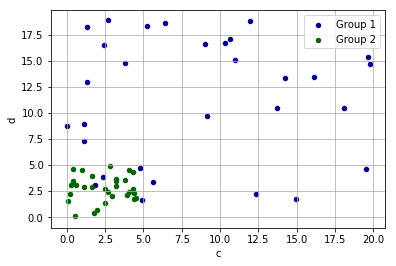

In [83]:
import pandas as pd 

df = pd.DataFrame(np.random.rand(30, 2)*20, columns=['a', 'b'])
df2 = pd.DataFrame(np.random.rand(30, 2)*5, columns=['c', 'd'])

ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df2.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

plt.grid()
plt.legend()
plt.show()